---
title: Splitting Data
nav_include: 4
---

**Stratification Goals**

There were two goals when splitting the data, the first was to ensure there was an equal distribution of each playlist type in each data set. To acheive this we grouped the data based on the playlist names. 

The secondary goal was to try and evenly split the data by number of followers, to ensure that our model saw playlists with all different levels of popularity for each playlist name. To acheive this we split each name group that had at least 100 playlists in it into 10 groups of follower size and then randomly assigned the playlists in each group based on the weights given to the `split_train_test_validate` function.

In [1]:
import numpy as np
import pandas as pd
import gzip
import csv

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import display

import os
import re
import json

import pylast

In [ ]:
df_key = pd.read_csv('data' + '/pidpos.csv.gz', compression='gzip', index_col=0)

In [3]:
df_key.head()

,pidpos,pidpos_id,track_id,album_id,artist_id,playlist_id
281,4-0,281,280,225,175,4
282,4-1,282,281,226,176,4
283,4-2,283,282,227,177,4
284,4-3,284,283,228,178,4
285,4-4,285,284,229,179,4


In [4]:
df_key.playlist_id.unique().shape

(241878,)

In [5]:
playlist_ids = df_key.playlist_id.unique()
song_ids = df_key.track_id.unique()
album_ids = df_key.album_id.unique()
artist_ids = df_key.artist_id.unique()

In [6]:
df_songs = pd.read_csv('data' + '/full_aug_songs.csv.gz', compression='gzip')

In [7]:
df_songs.head()

,name,id,uri,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,lose control feat ciara fat man scoop,0,0UaMYEvWZi0ZqiDOoHU3YI,226.863,0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4
1,toxic,1,6I9VzXrHxO9rA9A5euc8Ak,198.800,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,4
2,crazy in love,2,0WqIKmW4BTrj3eJFmnCKMv,235.933,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4
3,rock your body,3,1AWQoqb9bSvzTjaLralEkT,267.266,0.891,0.714,4,-6.055,0,0.1400,0.20200,0.000234,0.0521,0.818,100.972,4
4,it wasnt me,4,1lzr43nnXAijIGYnCT8M8H,227.600,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,4


In [8]:
df2_songs = pd.read_csv('data/'+'songs.csv.gz', compression='gzip')

In [9]:
df2_songs.head()

,name,id,uri,duration_ms
0,lose control feat ciara fat man scoop,0,0UaMYEvWZi0ZqiDOoHU3YI,226.863
1,toxic,1,6I9VzXrHxO9rA9A5euc8Ak,198.800
2,crazy in love,2,0WqIKmW4BTrj3eJFmnCKMv,235.933
3,rock your body,3,1AWQoqb9bSvzTjaLralEkT,267.266
4,it wasnt me,4,1lzr43nnXAijIGYnCT8M8H,227.600


In [10]:
df_artists = pd.read_csv('data/'+'artists.csv.gz', compression='gzip')

In [11]:
df_artists.head()

,name,id
0,missy elliott,0
1,britney spears,1
2,beyonc,2
3,justin timberlake,3
4,shaggy,4


In [12]:
df_playlists = pd.read_csv('data/'+'playlists.csv.gz', compression='gzip')

In [13]:
df_playlists.head()

,id,name,num_followers,collaborative,num_tracks,num_albums
0,0,throwbacks,1,1,52,47
1,1,awesome playlist,1,1,39,23
2,2,korean,1,1,64,51
3,3,mat,1,1,126,107
4,4,90s,2,1,17,16


In [14]:
df_playlists.describe()

,id,num_followers,collaborative,num_tracks,num_albums
count,984547.000000,984547.000000,984547.0,984547.000000,984547.000000
mean,492273.000000,2.612579,1.0,66.388307,49.626047
std,284214.382075,129.852211,0.0,53.685494,39.993167
min,0.000000,1.000000,1.0,5.000000,2.000000
25%,246136.500000,1.000000,1.0,26.000000,20.000000
50%,492273.000000,1.000000,1.0,49.000000,37.000000
75%,738409.500000,1.000000,1.0,92.000000,68.000000
max,984546.000000,71643.000000,1.0,376.000000,244.000000


In [15]:
df_playlists_trim = df_playlists.iloc[playlist_ids]

In [16]:
df_playlists_trim.head()

,id,name,num_followers,collaborative,num_tracks,num_albums
4,4,90s,2,1,17,16
8,8,bop,2,1,46,37
10,10,abby,2,1,72,60
20,20,mixtape,3,1,14,9
22,22,fall 17,2,1,42,39


In [17]:
df_playlists_trim.describe()

,id,num_followers,collaborative,num_tracks,num_albums
count,241878.000000,241878.000000,241878.0,241878.000000,241878.000000
mean,492351.319314,7.563855,1.0,82.227152,62.454018
std,284354.961297,261.919131,0.0,58.002575,44.234803
min,4.000000,2.000000,1.0,5.000000,2.000000
25%,245372.500000,2.000000,1.0,36.000000,28.000000
50%,492954.500000,2.000000,1.0,67.000000,51.000000
75%,737872.000000,3.000000,1.0,116.000000,87.000000
max,984540.000000,71643.000000,1.0,250.000000,242.000000


In [18]:
df_albums = pd.read_csv('data/'+'albums.csv.gz', compression='gzip')

In [19]:
df_albums.head()

,name,id
0,the cookbook,0
1,in the zone,1
2,dangerously in love alben fr die ewigkeit,2
3,justified,3
4,hot shot,4


In [20]:
name_counts = df_playlists_trim.name.value_counts()

In [21]:
name_counts.shape[0]

14831

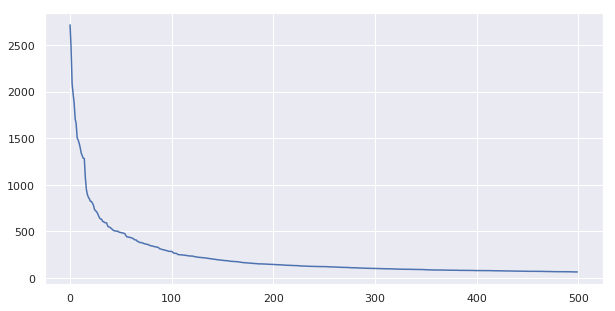

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(500), name_counts[0:500])
plt.show()

In [76]:
name_counts[name_counts>=100].shape

(315,)

In [26]:
groups = df_playlists_trim.groupby(['name'])

In [170]:
def divide_df(df, p1, p2, p1_split, p2_split, rest_split):
    split = np.random.randint(1, 11, size=df.shape[0])
    p1_thr = np.int(p1*10)
    p2_thr = np.int((p2+p1)*10)
    p1_split = np.append(p1_split, df.iloc[split <= p1_thr]['id'].values)
    p2_split = np.append(p2_split, df.iloc[(split > p1_thr) & (split <= p2_thr)]['id'].values)
    rest_split = np.append(rest_split, df.iloc[split > p2_thr]['id'].values)
    return p1_split, p2_split, rest_split

In [171]:
def split_train_test_validate(df_groupby, test_prop = .1, validate_prop = .1):
    test_id = np.array([])
    train_id = np.array([])
    validate_id = np.array([])
    for name, group in df_groupby:
        if group.shape[0]<100:
            test_id, validate_id, train_id = divide_df(group, test_prop, validate_prop, test_id, validate_id, train_id)
        else:
            group2 = group.sort_values(by='num_followers')
            num_groups = np.int(group2.shape[0]/10)
            step_size = np.int(group2.shape[0]/num_groups)
            for step in range(1, num_groups):
                subgroup = group2.iloc[(step-1)*step_size:step*step_size]
                test_id, validate_id, train_id = divide_df(subgroup, test_prop, validate_prop, test_id, validate_id, train_id)
            subgroup = group2.iloc[step*step_size:]
            test_id, validate_id, train_id = divide_df(subgroup, test_prop, validate_prop, test_id, validate_id, train_id)
    return train_id, test_id, validate_id

In [172]:
train_id, test_id, validate_id = split_train_test_validate(groups)

In [175]:
train_id.shape[0]/df_playlists_trim.shape[0]

0.8003249572098331

In [176]:
test_id.shape[0]/df_playlists_trim.shape[0]

0.10030676622098744

In [177]:
validate_id.shape[0]/df_playlists_trim.shape[0]

0.0993682765691795

In [173]:
test_id.shape[0]+train_id.shape[0]+validate_id.shape[0], df_playlists_trim.shape[0]

(241878, 241878)

In [2]:
df_raw_aug = pd.read_csv('data/raw_aug_playlists.csv.gz')

In [3]:
df_raw_aug.head()

,playlist_id,sum_num_tracks,num_followers,num_tracks,num_albums,mean_duration,mean_danceability,mean_energy,max_key,max_loudness,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,max_tempo,max_time_signature
0,4,17,2.0,17.0,16.0,255.016588,0.576765,0.650535,9.0,-4.066,0.041159,0.177148,0.081875,0.166524,0.490765,174.302,4.0
1,8,46,2.0,46.0,37.0,216.280891,0.512370,0.686239,11.0,-3.009,0.050311,0.179107,0.057182,0.188674,0.538587,185.170,4.0
2,10,72,2.0,72.0,60.0,229.388917,0.725931,0.626431,11.0,-1.578,0.186018,0.173206,0.000086,0.181185,0.459111,193.206,4.0
3,20,14,3.0,14.0,9.0,171.202429,0.824429,0.573357,11.0,-3.062,0.209914,0.100930,0.007138,0.107114,0.379657,160.988,4.0
4,22,42,2.0,42.0,39.0,215.148548,0.645238,0.622119,11.0,-3.093,0.081374,0.173115,0.010118,0.170240,0.427000,180.043,5.0


In [30]:
df_raw_aug.index = df_raw_aug.playlist_id.values

In [31]:
df_raw_aug.head()

,playlist_id,sum_num_tracks,num_followers,num_tracks,num_albums,mean_duration,mean_danceability,mean_energy,max_key,max_loudness,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,max_tempo,max_time_signature
4,4,17,2.0,17.0,16.0,255.016588,0.576765,0.650535,9.0,-4.066,0.041159,0.177148,0.081875,0.166524,0.490765,174.302,4.0
8,8,46,2.0,46.0,37.0,216.280891,0.512370,0.686239,11.0,-3.009,0.050311,0.179107,0.057182,0.188674,0.538587,185.170,4.0
10,10,72,2.0,72.0,60.0,229.388917,0.725931,0.626431,11.0,-1.578,0.186018,0.173206,0.000086,0.181185,0.459111,193.206,4.0
20,20,14,3.0,14.0,9.0,171.202429,0.824429,0.573357,11.0,-3.062,0.209914,0.100930,0.007138,0.107114,0.379657,160.988,4.0
22,22,42,2.0,42.0,39.0,215.148548,0.645238,0.622119,11.0,-3.093,0.081374,0.173115,0.010118,0.170240,0.427000,180.043,5.0


In [6]:
train_pl = pd.read_csv('data/train_playlists.csv.gz', index_col=0)
test_pl = pd.read_csv('data/test_playlists.csv.gz', index_col=0)
validate_pl = pd.read_csv('data/validate_playlists.csv.gz', index_col=0)

In [8]:
train_id = train_pl.id.values
test_id = test_pl.id.values
validate_id = validate_pl.id.values

In [ ]:
train_aug_pl = df_raw_aug.loc[train_id]
test_aug_pl = df_raw_aug.loc[test_id]
validate_aug_pl = df_raw_aug.loc[validate_id]

In [53]:
train_aug_pl.to_csv('data/train_aug_playlists.csv.gz', compression='gzip')
test_aug_pl.to_csv('data/test_aug_playlists.csv.gz', compression='gzip')
validate_aug_pl.to_csv('data/validate_aug_playlists.csv.gz', compression='gzip')

In [26]:
df_raw_aug.isnull().values.any()

False

In [52]:
train_aug_pl.isnull().values.any(), test_aug_pl.isnull().values.any(), validate_aug_pl.isnull().values.any()

(False, False, False)

In [48]:
test_aug_pl[test_aug_pl.isnull().any(axis=1)]

,playlist_id,sum_num_tracks,num_followers,num_tracks,num_albums,mean_duration,mean_danceability,mean_energy,max_key,max_loudness,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,max_tempo,max_time_signature
244514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
test_aug_pl = test_aug_pl.dropna()

In [20]:
validate_aug_pl.shape, validate_id.shape

((24115, 17), (24115,))

In [37]:
np.sum(df_raw_aug.playlist_id.isin(test_id).values), test_id.shape

(24200, (24201,))